# Статистики за корона вирусот во Македонија

In [33]:
import pandas as pd
import nbinteract as nbi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:


df = pd.read_csv("podatoci/Корона вирус податоци Македонија - Заразени.csv", header=0,
                 names=['location', 'infected_in', "date", "count", "age_range"])

df
# res = df.groupby(["Локација (во Македонија)", "Возраст"]).sum()


# df.loc[(df["Локација (во Македонија)"]=="Дебар") & (df["Возраст"]=="50-59"), "Број на случаи"].sum()

# res


,location,infected_in,date,count,age_range
0,Скопје,Италија,2020-02-26,1,50-59
1,Дебар,Италија,2020-03-06,2,60-69
2,Дебар,Македонија,2020-03-09,3,непознато
3,Скопје,Италија,2020-03-09,1,непознато
4,Дебар,Македонија,2020-03-11,2,непознато
5,Дебар,Македонија,2020-03-13,4,50-59
6,Скопје,Шпанија,3/14/2020,1,непознато
7,Дебар,Македонија,3/14/2020,5,непознато


In [18]:
# for num, age_range in enumerate(df["Возраст"].drop_duplicates()):
#     values = df[df['Возраст'] == age_range].groupby(["Локација (во Македонија)"]).sum().loc[:,'Број на случаи']
#     print(values)
    
    
# df

Локација (во Македонија)
Дебар     4
Скопје    1
Name: Број на случаи, dtype: int64
Локација (во Македонија)
Дебар    2
Name: Број на случаи, dtype: int64
Локација (во Македонија)
Дебар     10
Скопје     2
Name: Број на случаи, dtype: int64


In [47]:
# fig, ax = plt.subplots(figsize=(10,7))

# colors = ["#006D2C", "#31A354","#74C476"]
# margin_bottom = np.zeros(len(df['Локација (во Македонија)'].drop_duplicates()))

# for num, age_range in enumerate(df["Возраст"].drop_duplicates()):
#     values = list(df[df['Возраст'] == age_range].groupby(["Локација (во Македонија)"]).sum().loc[:,'Број на случаи'])
    
#     df[df['Возраст'] == age_range].plot.bar(x='Локација (во Македонија)', y='Број на случаи', ax=ax, stacked=True, 
#                                     bottom = margin_bottom, color=colors[num], label=age_range)
#     margin_bottom += values

# plt.show()
# # infected_plot = res.plot(kind='bar', legend=None, title="Број на заразени по град во Македонија")
# # infected_plot.set_ylabel("Број случаи")

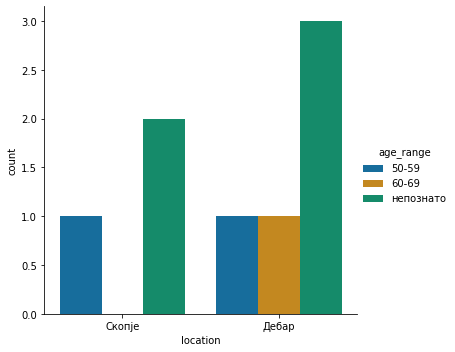

In [57]:
sns.catplot(data=df, x="location", y=None, hue="age_range", kind="count", palette="colorblind")

In [73]:
all_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

all_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [74]:
confirmed = pd.melt(all_data, id_vars=["Country/Region"], value_vars=all_data.columns[4:], var_name="date", value_name="count")

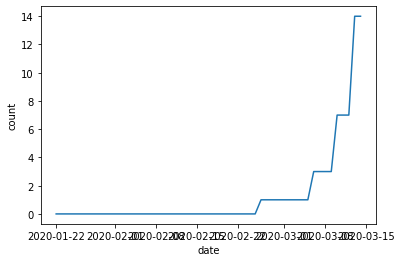

In [79]:

confirmed["date"]=pd.to_datetime(confirmed["date"])

p = confirmed[confirmed["Country/Region"]=="North Macedonia"]


sns.lineplot(x="date", y="count", data=p)